In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import explained_variance_score, make_scorer
from sklearn.model_selection import KFold
%matplotlib inline

In [59]:
size = 200
cv = KFold(size, shuffle=True)
X = np.reshape(np.random.rand(size , 1)*20,(-1,1))
for i in range (0,len(X)):
    for j in range (i+1, len(X)):
        if (float(X[i]) > float(X [j])):
            temp = float(X[i])
            (X[i])  = float(X[j])
            (X[j]) = temp
y = np.array([[2*x[0]**4 +x[0]**3 + 7 *x[0]**2 + x[0]-3.58 ] for x in X])
MSE = np.zeros ((1 , 32))
k_list = [2,4,8,16]

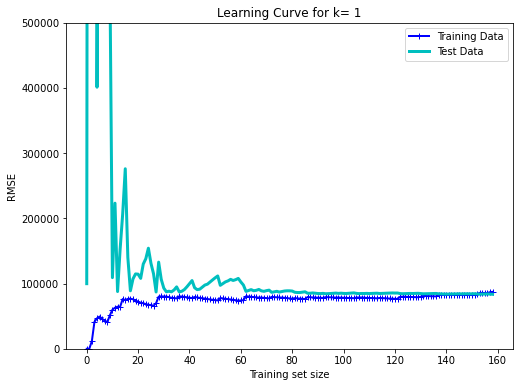

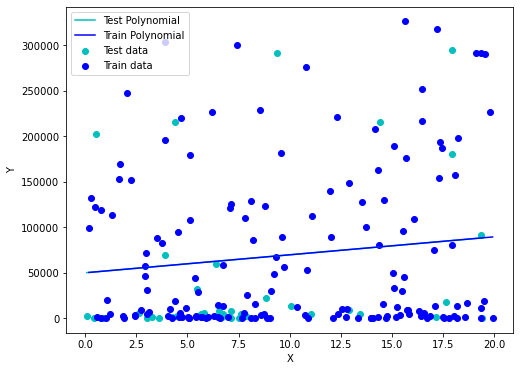

In [83]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for i in range (0,len(X_train)):
    for j in range (i+1, len(X_train)):
        if (float(X_train[i]) > float(X_train [j])):
            temp = float(X_train[i])
            (X_train[i])  = float(X_train[j])
            (X_train[j]) = temp
for i in range (0,len(X_test)):
    for j in range (i+1, len(X_test)):
        if (float(X_test[i]) > float(X_test [j])):
            temp = float(X_test[i])
            (X_test[i])  = float(X_test[j])
            (X_test[j]) = temp

def plot_learning_curves(model, X, y, k):
    
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
    plt.figure(figsize=(8, 6))
    ax = plt.subplot()
    plt.plot(np.sqrt(train_errors), "b-+", linewidth=2, label="Training Data")
    plt.plot(np.sqrt(test_errors), "c-", linewidth=3, label="Test Data")
    plt.legend()
    plt.ylabel('RMSE')
    plt.xlabel ('Training set size')
#    ax.set_yscale('log')
    plt.ylim (0 , 5e5)
    plt.title ('Learning Curve for k= {}'.format(k))
    if k == 1:
        MSE [0][0] = train_errors[-1]
        MSE [0][16] = test_errors[-1]
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.scatter(X_test, y_test, color = 'c' , label = 'Test data')
        ax.scatter(X_train, y_train, color = 'blue' , label = 'Train data') 
        ax.plot(X_test, model.predict(X_test), color = 'c' , label = 'Test Polynomial')
        ax.plot(X_train, model.predict(X_train), color = 'blue' , label = 'Train Polynomial') 
        xlabel = ax.set_xlabel ('X')
        ylabel = ax.set_ylabel ('Y')
    leg = ax.legend()
    #ax.label.set_fontsize(10)
    plt.show() 
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y , 1)


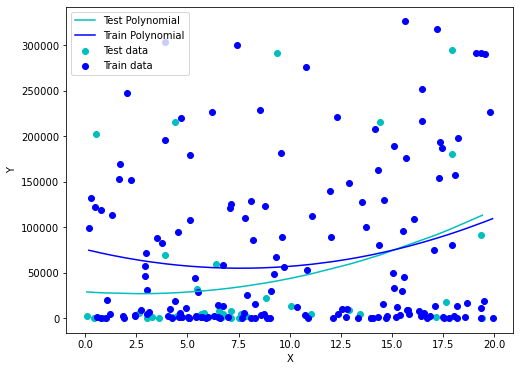

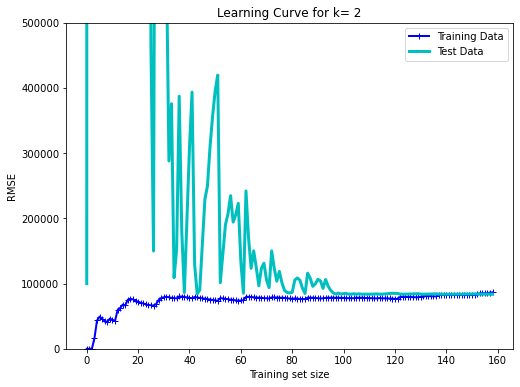

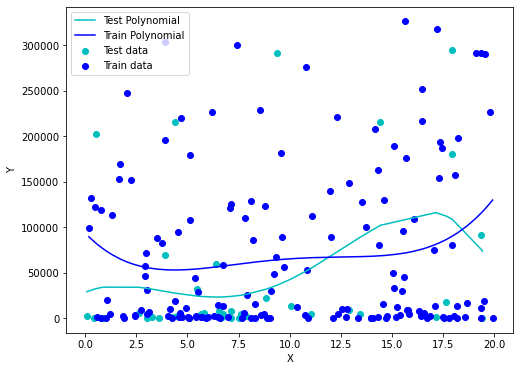

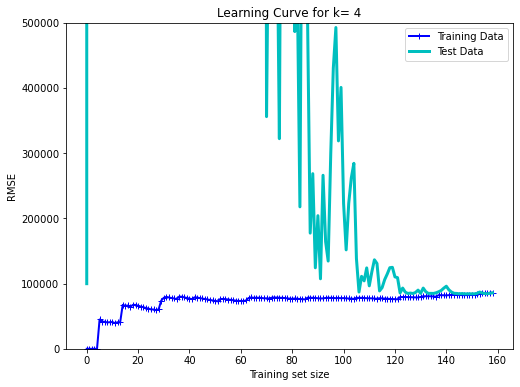

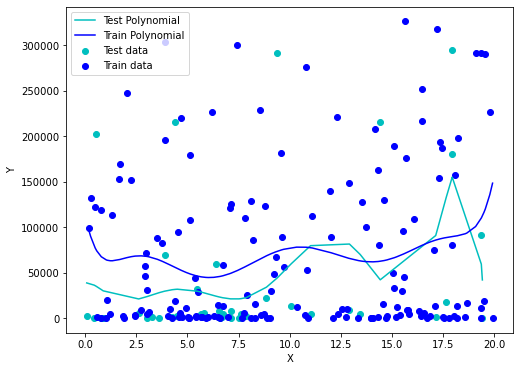

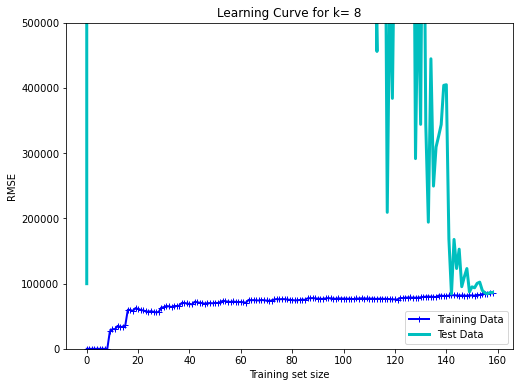

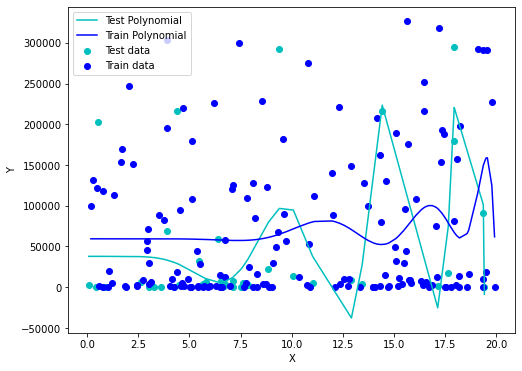

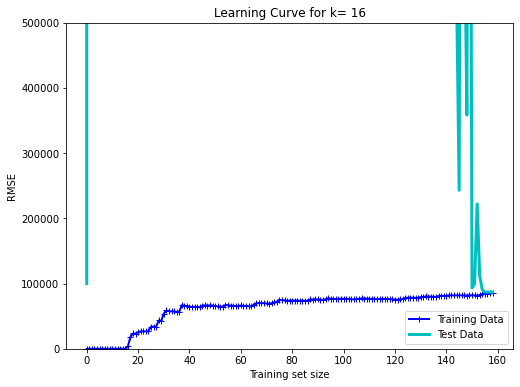

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
for k in k_list:
    polynomial_regression = Pipeline([
            ("poly_features", PolynomialFeatures(degree=k, include_bias=False)),
            ("lin_reg", LinearRegression()),
        ])
    
    poly_train = PolynomialFeatures(degree = k) 
    x_poly_train = poly_train.fit_transform(X_train)  
    poly_train.fit(x_poly_train, y_train) 
    lin2_train = LinearRegression() 
    lin2_train.fit(x_poly_train, y_train)
    predicted_list  = lin2_train.predict(poly_train.fit_transform(X_train))
    MSE [0][k-1] = mean_squared_error(y_train, predicted_list)
    poly_test = PolynomialFeatures(degree = k) 
    x_poly_test = poly_test.fit_transform(X_test)  
    poly_test.fit(x_poly_test, y_test) 
    lin2_test = LinearRegression() 
    lin2_test.fit(x_poly_test, y_test) 
    predicted_list  = lin2_test.predict(poly_test.fit_transform(X_test))
    

    MSE [0][k+15] = mean_squared_error(y_test, predicted_list)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(X_test, y_test, color = 'c' , label = 'Test data')
    ax.scatter(X_train, y_train, color = 'blue' , label = 'Train data')
    ax.plot(X_test, lin2_test.predict(poly_test.fit_transform(X_test)), color = 'c' , label = 'Test Polynomial')
    ax.plot(X_train, lin2_train.predict(poly_train.fit_transform(X_train)), color = 'blue' , label = 'Train Polynomial') 
    leg = ax.legend()
    xlabel = ax.set_xlabel ('X')
    ylabel = ax.set_ylabel ('Y')
    plt.show()
    
    plot_learning_curves(polynomial_regression, X, y , k)

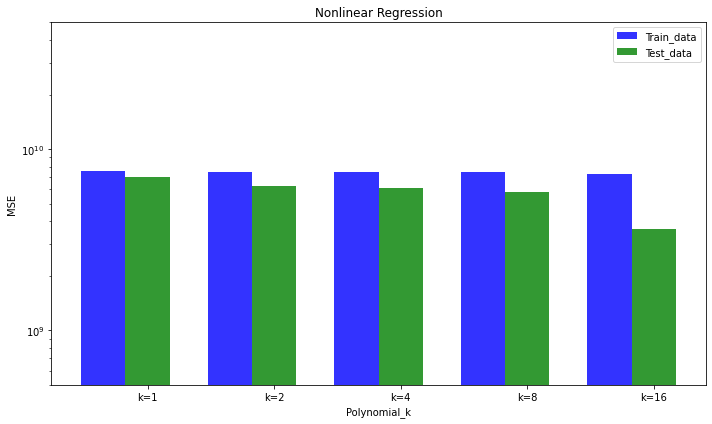

In [85]:
# Plotting MSE values for k = 1 , 2 ,4 , 8 , 16

n_groups = 5
Train_data = (MSE[0][0], MSE[0][1], MSE[0][3], MSE[0][3], MSE[0][15])
Test_data = (MSE[0][16], MSE[0][17], MSE[0][19], MSE[0][23], MSE[0][31])

fig, ax = plt.subplots(figsize=(10,6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, Train_data, bar_width,
alpha=opacity,
color='b',
label='Train_data')

rects2 = plt.bar(index + bar_width, Test_data, bar_width,
alpha=opacity,
color='g',
label='Test_data')

plt.xlabel('Polynomial_k')
plt.ylabel('MSE')
plt.title('Nonlinear Regression')
plt.xticks(index + bar_width, ('k=1', 'k=2', 'k=4', 'k=8', 'k=16'))
plt.legend()
ax.set_yscale('log')
plt.ylim (5e8 , 5e10)
plt.tight_layout()
plt.show()

